<a href="https://colab.research.google.com/github/Rodrigo2898/machine_-earning-exemplos-rr/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  tensorflow

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
logdir='log'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 69s 34ms/step - loss: 0.1435 - accuracy: 0.9559 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0394 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0359 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0323 - val_accuracy: 0.9893


In [7]:
y_true=test_labels
y_pred=model.predict(test_images)
y_predict=np.argmax(y_pred, axis=1)
# classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 11ms/step


In [8]:
classes=[0,1,2,3,4,5,6,7,8,9]

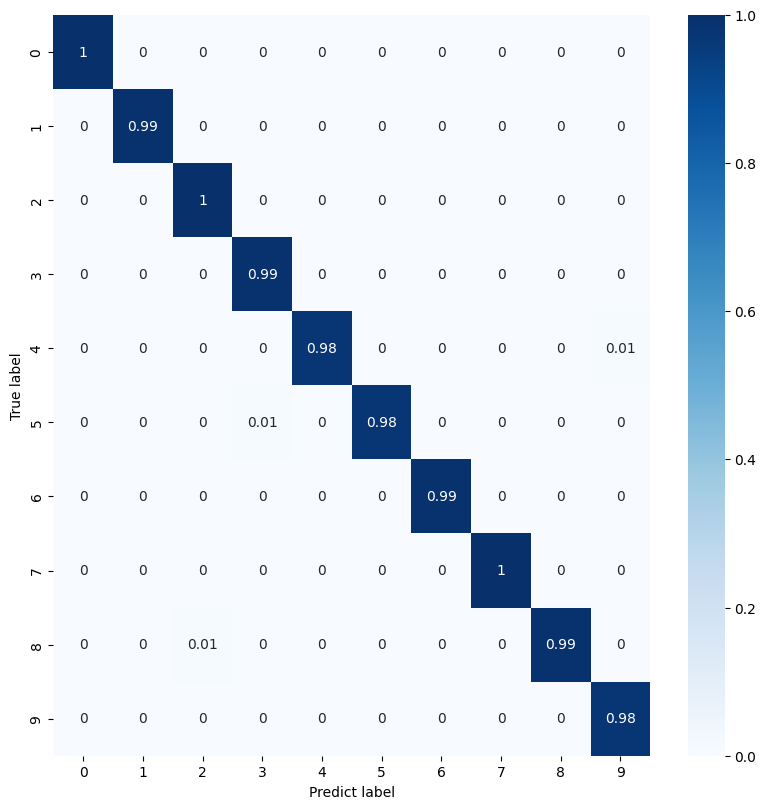

In [9]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_predict).numpy()
# con_mat_norm = np.around(con_mat.asType('float') / con_mat.sum(axis=1)[1, np.newaxis], decimals=2)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [11]:
# Cálculo da acurácia
correct_predictions = np.sum(y_predict == test_labels)
accuracy = correct_predictions / len(test_images)
print(accuracy)
accuracy = accuracy_score(test_labels, y_predict)
print('sklearn', accuracy)

0.9893
sklearn 0.9893


In [12]:
# Calculando a sensibilidade(recall)
# Sem sklearn
y_onehot = tf.one_hot(test_labels,10)  # convertendo as labels para one-hot econding
tp = tf.math.reduce_sum(y_pred * y_onehot, axis=0) # Verdadeiros positivos por classe
fn = tf.math.reduce_sum(y_onehot * (1 - y_pred), axis=0) # Falsos negativos por classe
recall = tp / (tp + fn)
# Com sklearn
recall = recall_score(test_labels, y_predict, average=None)
print(recall)

[0.99693878 0.99207048 0.99612403 0.99108911 0.97657841 0.98430493
 0.99060543 0.99513619 0.98562628 0.98315164]


In [13]:
# Calculo da precisão
precision = tp / tf.math.reduce_sum(y_pred, axis=0)  # Precisao por classe
print(precision)

tf.Tensor(
[0.9893974  0.99205446 0.983865   0.98659545 0.99255955 0.99003327
 0.98620313 0.9786914  0.9907902  0.97731936], shape=(10,), dtype=float32)


In [14]:
# Calculo da especificidade
tn = tf.math.reduce_sum((1 - y_pred) * (1 - y_onehot), axis=0)  # Verdadeiros negativos por classe
fp = tf.math.reduce_sum(y_pred * (1 - y_onehot), axis=0)  # Falsos positivos por classe
specificity = tn / (tn + fp)
print(specificity)

tf.Tensor(
[0.99884135 0.9989846  0.99812376 0.9984903  0.9992044  0.9990335
 0.9985331  0.9975216  0.99901557 0.9974508 ], shape=(10,), dtype=float32)


In [15]:
# Calcullo do F1-score
precision = tp / tf.math.reduce_sum(y_pred, axis=0)  # Precisão por classe
f1 = 2 * recall * precision / (recall + precision)  # F1-score por classe

print(f"Acurácia: {accuracy:.4f}")
print(f"\nRecall (Sensibilidade) por Classe:")
for i, c in enumerate(classes):
  print(f"  Class {c}: {recall[i]:.4f}")

print(f"\nPrecisão per Classe:")
for i, c in enumerate(classes):
  print(f" Class {c}: {precision[i]:.4f}")


print("\nEspecificidade por Classe")
for i, c in enumerate(classes):
  print(f" Class {c}: {specificity[i]:.4f}")


print(f"\nF1-Score por Classe:")
for i, c in enumerate(classes):
  print(f"  Class {c}: {f1[i]:.4f}")



Acurácia: 0.9893

Recall (Sensibilidade) por Classe:
  Class 0: 0.9969
  Class 1: 0.9921
  Class 2: 0.9961
  Class 3: 0.9911
  Class 4: 0.9766
  Class 5: 0.9843
  Class 6: 0.9906
  Class 7: 0.9951
  Class 8: 0.9856
  Class 9: 0.9832

Precisão per Classe:
 Class 0: 0.9894
 Class 1: 0.9921
 Class 2: 0.9839
 Class 3: 0.9866
 Class 4: 0.9926
 Class 5: 0.9900
 Class 6: 0.9862
 Class 7: 0.9787
 Class 8: 0.9908
 Class 9: 0.9773

Especificidade por Classe
 Class 0: 0.9988
 Class 1: 0.9990
 Class 2: 0.9981
 Class 3: 0.9985
 Class 4: 0.9992
 Class 5: 0.9990
 Class 6: 0.9985
 Class 7: 0.9975
 Class 8: 0.9990
 Class 9: 0.9975

F1-Score por Classe:
  Class 0: 0.9932
  Class 1: 0.9921
  Class 2: 0.9900
  Class 3: 0.9888
  Class 4: 0.9845
  Class 5: 0.9872
  Class 6: 0.9884
  Class 7: 0.9868
  Class 8: 0.9882
  Class 9: 0.9802


In [16]:
# Gerando curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
# Calcule a pontuação ROC AUC para cada classe usando o parâmetro average=None
roc_auc_scores = roc_auc_score(y_true, y_pred, average=None, multi_class='ovr')
print(roc_auc_scores)

# Calcule a média simples das pontuações ROC AUC usando o parâmetro average=macro
roc_auc_mean = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
print(roc_auc_mean)

[0.99996007 0.99998012 0.99997007 0.99993414 0.99995664 0.99988073
 0.99993535 0.99994015 0.9999222  0.99986982]
0.9999349282624589
